In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
import numpy
import random
import math
import pandas as pd

In [53]:
# Load a model
model = load_model(os.path.join('..', 'models', 'recognition', 'trafficsignrecognizer07.h5'))

In [12]:
from constants import DATA_CLASSES

1/1 [==============================] - 0s 22ms/step
11
Prediction: Right-of-way at intersection


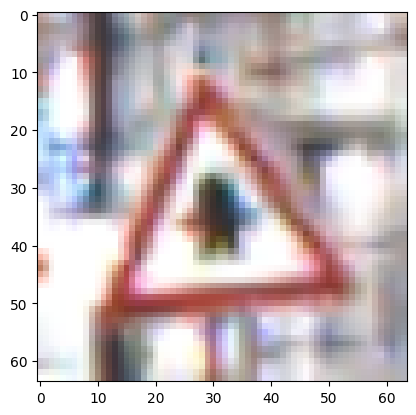

In [61]:
# Predict for a single image
img = cv2.imread("../data/recognition/Test/00025.png")
color_corrected = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(color_corrected, (64, 64))

y = model.predict(numpy.expand_dims(resize/255, 0))
plt.imshow(resize.numpy().astype(int))
print(y.argmax())
print(f"Prediction: {DATA_CLASSES[y.argmax()]}")

1/1 [==============================] - 0s 27ms/step
Incorrect prediction: 'Dangerous curve left', ground truth: 'Slippery road'
Incorrect prediction: 'End speed + passing limits', ground truth: 'Stop'
30 out of 32 predicted correctly (93.75%)


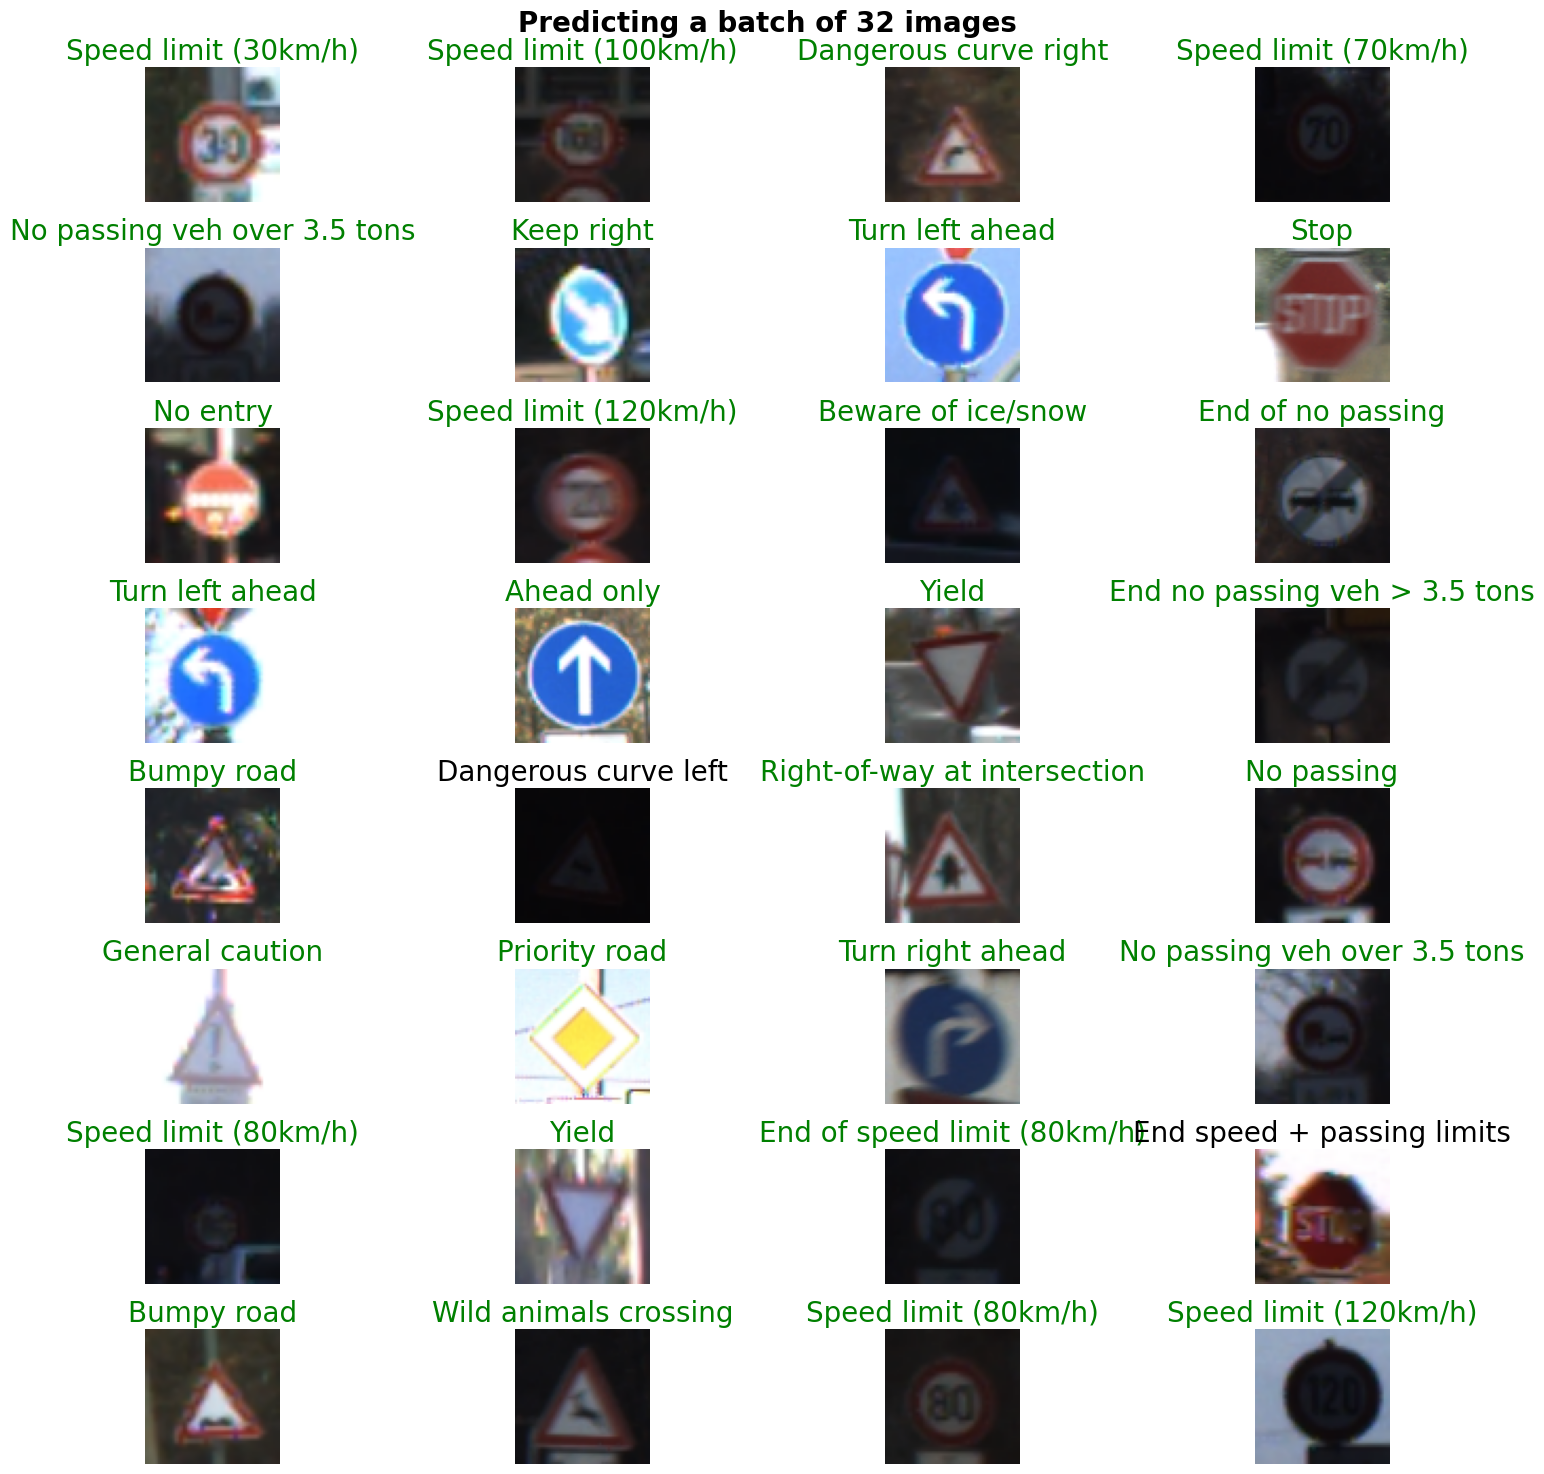

In [64]:
# Predict a batch of images
TEST_COUNT = 32
PLT_COLS = 4
PLT_ROWS = math.floor(TEST_COUNT / PLT_COLS)

dir = '../data/recognition'

df = pd.read_csv(os.path.join(dir, 'Test.csv'))
test_files = df['Path'].values
labels = df['ClassId'].values

test_entries = zip(test_files, labels)
test_samples = random.sample(list(test_entries), TEST_COUNT)


preprocessed_samples = []
images = []

for idx, s in enumerate(test_samples):
   path, _ = s
   img = cv2.imread(os.path.join(dir, path))
   color_corrected = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   resize = tf.image.resize(color_corrected, (64, 64)) 

   images.append(resize)
   preprocessed_samples.append(resize/255)

x_train = tf.convert_to_tensor(preprocessed_samples) 
ys = model.predict(x_train)


plt.figure(figsize=(15, 15))
plt.suptitle(f"Predicting a batch of {TEST_COUNT} images", fontsize=20, fontweight='bold')

correct_count = 0
for idx, y in enumerate(ys):
   yidx = y.argmax()
   label = test_samples[idx][1]
   image = images[idx]
   
   plt.subplot(PLT_ROWS, PLT_COLS, idx + 1)
   plt.imshow(image.numpy().astype(int))
   plt.axis('off')
   label_name = DATA_CLASSES[yidx]
   title = plt.title(label_name, fontsize=20)
   if yidx == label:
      correct_count += 1
      plt.setp(title, color='g')
   else:
      print(f"Incorrect prediction: '{label_name}', ground truth: '{DATA_CLASSES[label]}'")

plt.tight_layout(w_pad=10.0)
print(f"{correct_count} out of {TEST_COUNT} predicted correctly ({correct_count / TEST_COUNT * 100}%)") 
   
# for idx, s in enumerate(test_samples):
#    path, label = s
#    img = cv2.imread(os.path.join(dir, path))
#    color_corrected = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#    resize = tf.image.resize(color_corrected, (256, 256)) 
   
#    y = model.predict(numpy.expand_dims(resize/255, 0))
#    yidx = y.argmax()
   
#    plt.subplot(PLT_ROWS, PLT_COLS, idx + 1)
#    plt.imshow(resize.numpy().astype(int))
#    plt.axis('off')
#    title = plt.title(classes[yidx], fontsize=20)
#    if yidx == label:
#       plt.setp(title, color='g')
#    plt.tight_layout(w_pad=10.0)